<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/INTERNAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier#sklearn.tree
from sklearn.ensemble import RandomForestClassifier#sklearn.ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)#s-1
"""choose the same random samples,
make the same tie-breaking decisions,
and produce the same final tree."""
dt.fit(X_train, y_train)#s-2
y_pred_dt = dt.predict(X_test)#s-3
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
def print_metrics(y_true, y_pred, model_name):
    print(model_name+" Performance")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, zero_division=0):.4f}\n")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")

Decision Tree Performance
Accuracy:  0.9415
Precision: 0.9712
Recall:    0.9352
F1 Score:  0.9528

Random Forest Performance
Accuracy:  0.9708
Precision: 0.9640
Recall:    0.9907
F1 Score:  0.9772



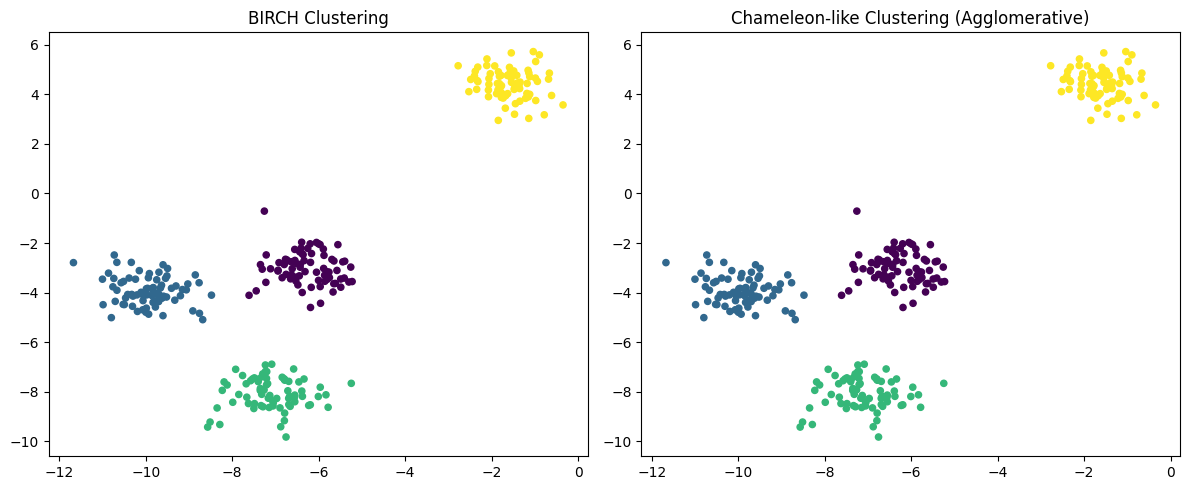

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Create synthetic data
X, Y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.60,
    random_state=1
)

# Step 2: BIRCH Clustering
brc = Birch(n_clusters=4, threshold=0.5, branching_factor=50)
labels_birch = brc.fit_predict(X)

plt.figure(figsize=(12, 5))

# Plot BIRCH results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_birch, s=20, cmap='viridis')
plt.title("BIRCH Clustering")

# Step 3: Chameleon-like Clustering (Agglomerative with average linkage)

chameleon_like = AgglomerativeClustering(n_clusters=4, linkage='average')
labels_chameleon = chameleon_like.fit_predict(X)

# Plot Chameleon-like results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_chameleon, s=20, cmap='viridis')
plt.title("Chameleon-like Clustering (Agglomerative)")

plt.tight_layout()
plt.show()


CHAMELEON, a hierarchical clustering algorithm that uses graph-based metrics to merge clusters based on connectivity and similarity.

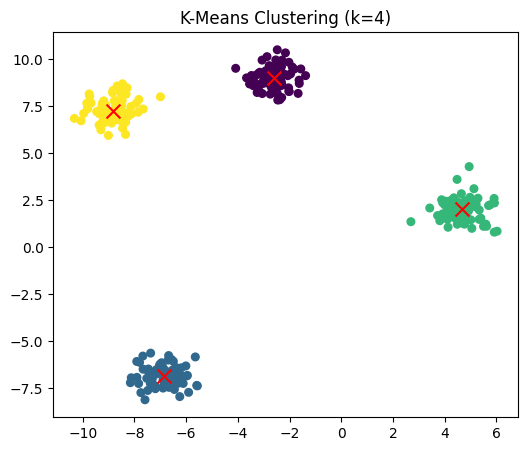

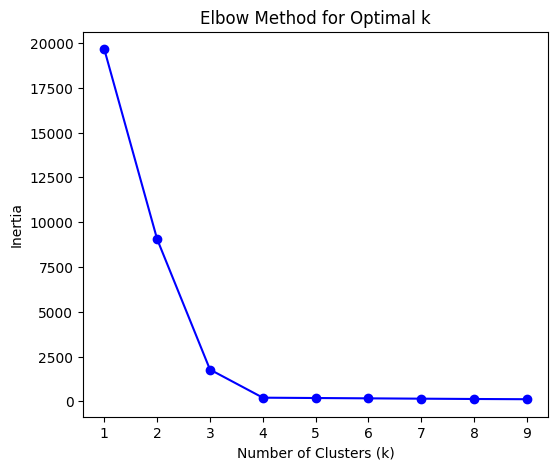

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.60,
    random_state=42
)

# Step 2: Fit K-Means for k=4 and visualize clusters
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s=100, marker='x')
plt.title("K-Means Clustering (k=4)")
plt.show()

# Step 3: Elbow Method to find optimal k
inertia_values = []   # inertia = sum of squared distances of samples to their nearest cluster center
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)#optimal_k = 4

# Step 4: Plot the Elbow Curve
plt.figure(figsize=(6,5))
plt.plot(K, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


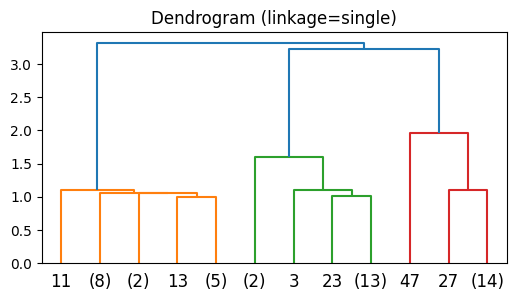

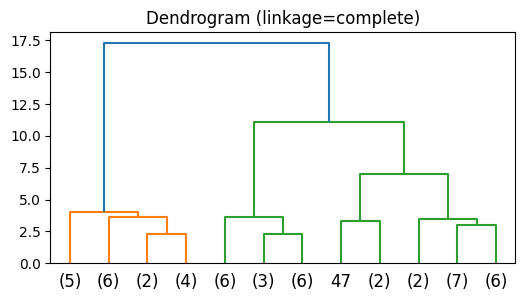

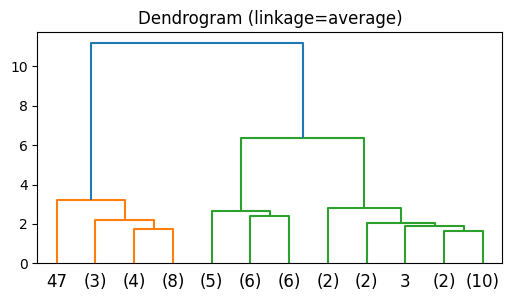

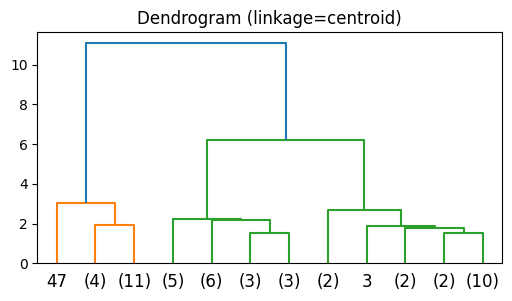

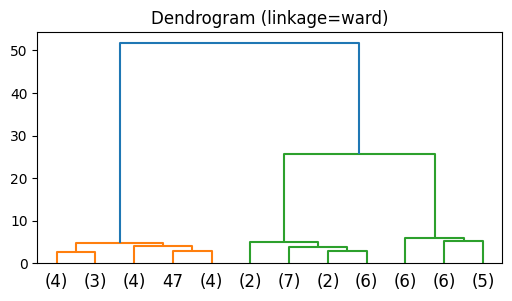

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X, _ = make_blobs(n_samples=50, centers=3, random_state=3)

# 1) Dendrogram and linkage matrix (single, complete, average, centroid)
for method in ['single', 'complete', 'average', 'centroid','ward']:
    plt.figure(figsize=(6,3))
    Z = hierarchy.linkage(pdist(X), method=method)#linkage matrix (Z), describing how clusters are merged.
    hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)#last p merged.show only upto 12 merges
    plt.title(f"Dendrogram (linkage={method})")
    plt.show()

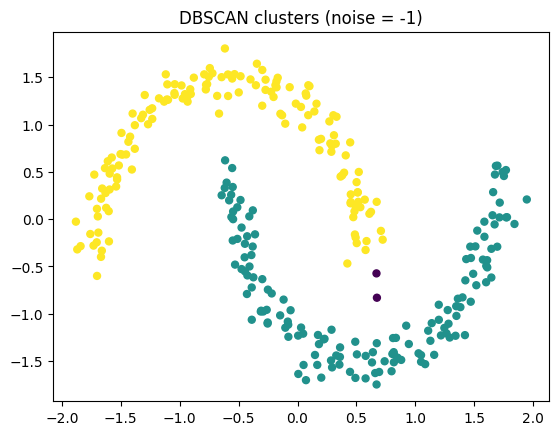

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.07, random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.25, min_samples=5)
labels = db.fit_predict(X)

# -1 are noise points
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=25)
plt.title("DBSCAN clusters (noise = -1)")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


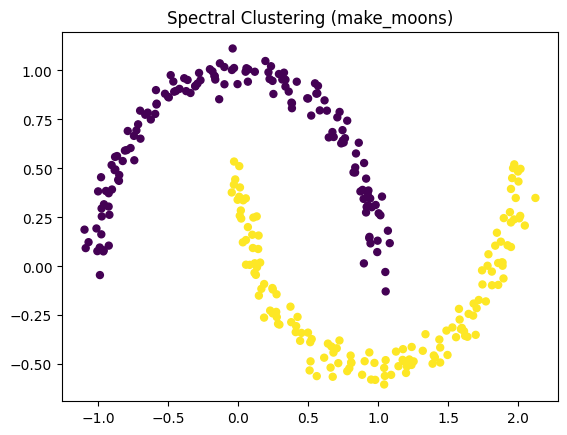

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering

# example: nonlinearly separable dataset
X, _ = datasets.make_moons(n_samples=300, noise=0.05, random_state=0)

sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans', random_state=0)
# n_clusters=2 → number of clusters to form (like k in KMeans, here 2 for the two moons).
# affinity='nearest_neighbors' → similarity graph is built by connecting each sample to its nearest neighbors, ideal for non-convex shapes (instead of RBF distance).
# n_neighbors=10 → each point connects to its 10 nearest neighbors; higher values make the graph more connected, lower can break it apart.
# assign_labels='kmeans' → after computing the spectral embedding, labels are assigned by running K-Means on the embedded data (alternative: 'discretize').
# random_state=0 → ensures reproducible results by fixing random initialization.
# Overall, this setup finds 2 clusters by capturing the data’s connectivity structure (useful for datasets like make_moons where KMeans alone would fail).
labels = sc.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, s=25)
plt.title("Spectral Clustering (make_moons)")
plt.show()

In [8]:
# Ensemble Voting Example on Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # y = 0 (malignant), 1 (benign)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'KNN': KNeighborsClassifier()
}

# 4. Train models and collect predictions/probabilities
predictions = {}
probabilities = {}
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]  # probability of class 1 (benign)

    predictions[name] = pred
    probabilities[name] = prob
    model_scores[name] = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {model_scores[name]:.4f}")

# 5. Max Voting (majority vote on predicted classes)
all_preds = np.array(list(predictions.values()))
max_vote_preds, _ = mode(all_preds, axis=0)
max_vote_preds = max_vote_preds.flatten()

# 6. Average Voting (average predicted probabilities)
avg_probs = np.mean(np.array(list(probabilities.values())), axis=0)
avg_vote_preds = (avg_probs >= 0.5).astype(int)

# 7. Weighted Average Voting
weights = np.array([model_scores[name] for name in models.keys()])
weights = weights / weights.sum()
weighted_probs = np.zeros_like(avg_probs)
for i, name in enumerate(models.keys()):
    weighted_probs += weights[i] * probabilities[name]
weighted_vote_preds = (weighted_probs >= 0.5).astype(int)

# 8. Evaluation Function
def print_metrics(y_true, y_pred, label):
    print(f"\n{label}")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")

# 9. Evaluate Ensembles
print_metrics(y_test, max_vote_preds, "Max Voting Ensemble")
print_metrics(y_test, avg_vote_preds, "Average Voting Ensemble")
print_metrics(y_test, weighted_vote_preds, "Weighted Average Voting Ensemble")


Decision Tree Accuracy: 0.9415
Logistic Regression Accuracy: 0.9766
KNN Accuracy: 0.9591

Max Voting Ensemble
Accuracy:  0.9766
Precision: 0.9727
Recall:    0.9907
F1 Score:  0.9817

Average Voting Ensemble
Accuracy:  0.9825
Precision: 0.9817
Recall:    0.9907
F1 Score:  0.9862

Weighted Average Voting Ensemble
Accuracy:  0.9825
Precision: 0.9817
Recall:    0.9907
F1 Score:  0.9862


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()

hard_voting = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='hard'
)

soft_voting = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='soft'
)

hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)

y_pred_hard = hard_voting.predict(X_test)
y_pred_soft = soft_voting.predict(X_test)

print("Hard Voting Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_hard):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_hard, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_hard, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_hard, zero_division=0):.4f}")

print("\nSoft Voting Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_soft):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_soft, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_soft, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_soft, zero_division=0):.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hard Voting Performance:
Accuracy:  0.9766
Precision: 0.9727
Recall:    0.9907
F1 Score:  0.9817

Soft Voting Performance:
Accuracy:  0.9825
Precision: 0.9817
Recall:    0.9907
F1 Score:  0.9862


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# 4. RandomForestRegressor with Out-of-Bag (OOB) score demonstration

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
test_score = r2_score(y_test, y_pred)

print("OOB Score (on training data):", rf.oob_score_)
print("R² Score (on test data):", test_score)


OOB Score (on training data): 0.8009217373230564
R² Score (on test data): 0.8045734925119942


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada.predict(X_test)))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:

import numpy as np
from sklearn.metrics import jaccard_score

def euclidean(a, b):
    a, b = np.asarray(a), np.asarray(b)
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    a, b = np.asarray(a), np.asarray(b)
    return np.sum(np.abs(a - b))

def minkowski(a, b, p):
    a, b = np.asarray(a), np.asarray(b)
    return np.sum(np.abs(a - b) ** p) ** (1.0 / p)

def cosine_similarity(a, b):
    a, b = np.asarray(a), np.asarray(b)
    denom = (np.linalg.norm(a) * np.linalg.norm(b))
    return np.dot(a, b) / denom if denom != 0 else 0.0

def jaccard_index(a, b):
    # For binary vectors. Convert to ints 0/1 if needed.
    a, b = np.asarray(a).astype(int), np.asarray(b).astype(int)
    # sklearn's jaccard_score expects 1D arrays and returns a float
    return jaccard_score(a, b)  # if vectors are binary

if __name__ == "__main__":
    p = [2,3,0,1]
    q = [5,7,1,0]
    print("Euclidean:", euclidean(p,q))
    print("Manhattan:", manhattan(p,q))
    print("Minkowski p=3:", minkowski(p,q,3))
    print("Cosine sim:", cosine_similarity(p,q))
    # for Jaccard, example binary vectors:
    a = [1,1,0,0]
    b = [1,1,1,0]
    print("Jaccard:", jaccard_index(a,b))